<div style="text-align: center">
  <h1 style="font-size: 48px;">Avaliação de Risco de Chumbo em Amêijoa-Vietnamita</h1>
</div>
    
<div style="text-align: center"> <h2>Simulação Monte Carlo<h2>
</div>

# Introdução

O presente trabalho tem como objetivo realizar uma simulação Monte Carlo para avaliar o risco de contaminação por chumbo em amêijoa vietnamita, utilizando dados do Inquérito Alimentar Nacional e de Atividade Física (IAN-AF) sobre o consumo de ameijoa e dados do Plano Nacional de Colhaitas de Amostras da ASAE (PNCA) referentes à monitorização de moluscos bivalves entre 2013 e 2022, sendo estes últimos referetntes a amostras que se encontram no retalho o que pode constituir de facto perigo para os consumidores. A análise de risco será realizada considerando os padrões internacionais de ingestão diária de referência (IDR) de chumbo, ou seja PTWI  de 25ug/kg/bw/week, visando contribuir para a avaliação da segurança alimentar e para a elaboração de medidas de controle e prevenção de contaminação por chumbo em alimentos.

Variáveis utilizadas como "inputs":
* Concentração de Chumbo em Amêijoa-Vietnamita
* Consumo de Amêijoa

Assumptions:
* Peso Corporal de acordo com o grupo etário

Variável "output":
* Ingestão de chumbo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.style.use("bmh")
import scipy.stats as stats
from fitter import Fitter, get_common_distributions, get_distributions
from scipy.stats import genextreme, gamma, lognorm
import scipy.stats
import math 
from scipy.stats import genextreme, gamma

# 1. Definição dos Inputs

Para a realização desta avaliação de risco utilizando a simulação monte carlo, serão considerados os seguintes inputs:
> Concentração de chumbo em amêijoa-vietnamita (PNCA)

> Consumo de amêijoa (IAN-AF)

> Peso Corporal de acordo com o grupo etário

Dito isto, será realizado uma análise exploratória de cada uma das variáveis utilizadas como inputs, de modo inferir tendências, padrões e ajustar a distribuição de cada uma das variáveis

## 1.1. Análise Exploratória dos dados do PNCA (Amêijoa-Vietnamita)

In [2]:
pnca = pd.read_excel("Dados_Bivalves_PNCA_Limpos_Final.xlsx")
pnca.head()

,Unnamed: 0,Nr. Amostra,Tipo de Amostra,Espécie,Parâmetro,Res.Trat.,Unidade,Data Colheita
0,0,1803338,Amêijoa,Amêijoa-vietnamita,Chumbo (LFQ),"1,2",mg/kg,2018-05-16
1,1,1306508,"Lambujinha, vivo",Lambujinha,Chumbo (LFQ),"1,1",mg/kg,2013-10-01
2,2,1400840,"Lambujinha, vivo",Lambujinha,Chumbo (LFQ),"1,0",mg/kg,2014-02-04
3,3,1803334,Mexilhão,Mexilhão,Chumbo (LFQ),"0,95",mg/kg,2018-05-15
4,4,1803332,Amêijoa,Amêijoa-vietnamita,Chumbo (LFQ),"0,8",mg/kg,2018-05-15


In [3]:
pnca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       101 non-null    int64         
 1   Nr. Amostra      101 non-null    int64         
 2   Tipo de Amostra  101 non-null    object        
 3   Espécie          101 non-null    object        
 4   Parâmetro        101 non-null    object        
 5   Res.Trat.        101 non-null    object        
 6   Unidade          101 non-null    object        
 7   Data Colheita    101 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 6.4+ KB


In [4]:
pnca["Res.Trat."].str.replace(",",".")

0       1.2
1       1.1
2       1.0
3      0.95
4       0.8
       ... 
96     0.04
97     0.04
98     0.04
99     0.04
100    0.04
Name: Res.Trat., Length: 101, dtype: object

In [5]:
pnca["Res.Trat."]=pnca["Res.Trat."].str.replace(",",".")
pnca["Res.Trat."]=pnca["Res.Trat."].astype(float)

In [6]:
pnca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       101 non-null    int64         
 1   Nr. Amostra      101 non-null    int64         
 2   Tipo de Amostra  101 non-null    object        
 3   Espécie          101 non-null    object        
 4   Parâmetro        101 non-null    object        
 5   Res.Trat.        101 non-null    float64       
 6   Unidade          101 non-null    object        
 7   Data Colheita    101 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 6.4+ KB


In [7]:
pnca.describe()

,Unnamed: 0,Nr. Amostra,Res.Trat.
count,101.000000,1.010000e+02,101.000000
mean,51.198020,1.607967e+06,0.258218
std,30.682575,1.866860e+05,0.232854
min,0.000000,1.306508e+06,0.040000
25%,25.000000,1.501022e+06,0.100000
50%,50.000000,1.603260e+06,0.190000
75%,77.000000,1.803210e+06,0.350000
max,105.000000,2.104387e+06,1.200000


In [8]:
# Eliminar atributos irrelevantes para o estudo
pnca.drop(columns=["Unnamed: 0","Nr. Amostra","Tipo de Amostra","Parâmetro","Data Colheita"], inplace=True)

In [9]:
pnca.head()

,Espécie,Res.Trat.,Unidade
0,Amêijoa-vietnamita,1.20,mg/kg
1,Lambujinha,1.10,mg/kg
2,Lambujinha,1.00,mg/kg
3,Mexilhão,0.95,mg/kg
4,Amêijoa-vietnamita,0.80,mg/kg


In [10]:
# Determinação do Número de Amostras por Espécie
pnca["Espécie"].value_counts()

Amêijoa-vietnamita    31
Mexilhão              22
Ostra                 15
Amêijoa-japonesa      13
Amêijoa-branca         7
Amêijoa-boa            4
Lambujinha             2
Amêijoa-zebra          2
Berbigão               2
Longueirão             2
Castanholas            1
Name: Espécie, dtype: int64

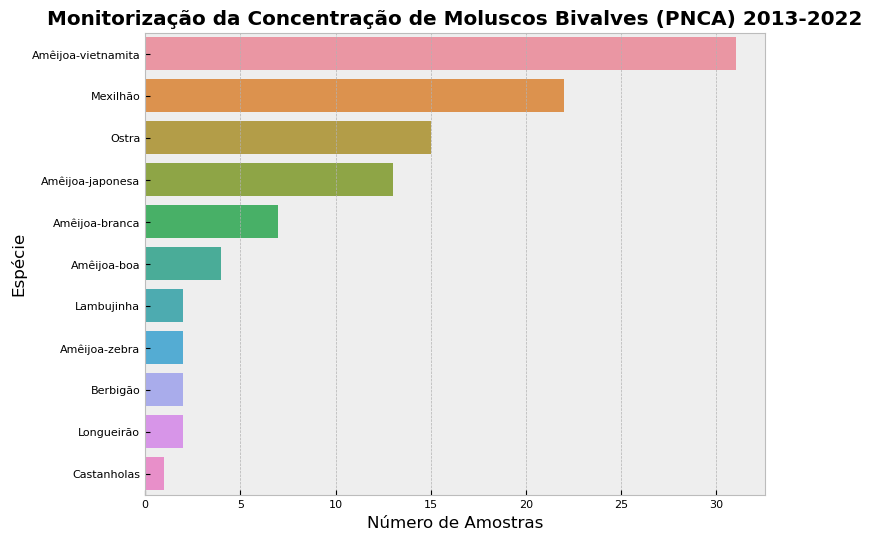

In [11]:
plt.figure(figsize=(8,6))
sns.countplot(y="Espécie",data=pnca,order=pnca["Espécie"].value_counts().index)

plt.title("Monitorização da Concentração de Moluscos Bivalves (PNCA) 2013-2022", fontweight="bold")
plt.ylabel("Espécie")
plt.yticks(fontsize=8)
plt.xlabel("Número de Amostras")
plt.xticks(fontsize=8)

plt.show()

No que se refere à monitorizão da concentração de chumbo no âmbito do PNCA, entre 2013 e 2022, salienta-se a amêijoa-vietnamita com maior monitorização, apresentando 31 amostras recolhidas.

In [12]:
# Concentração de chumbo por espécie
pnca.groupby("Espécie").agg(Média=("Res.Trat.","mean"),
                           Std=("Res.Trat.","std")).sort_values(by="Média",ascending=False)

,Média,Std
Espécie,,
Lambujinha,1.050000,0.070711
Amêijoa-vietnamita,0.398387,0.221977
Amêijoa-zebra,0.315000,0.233345
Berbigão,0.285000,0.162635
Castanholas,0.260000,NaN
Mexilhão,0.222273,0.210734
Longueirão,0.210000,0.240416
Ostra,0.186667,0.073840
Amêijoa-branca,0.094286,0.078285


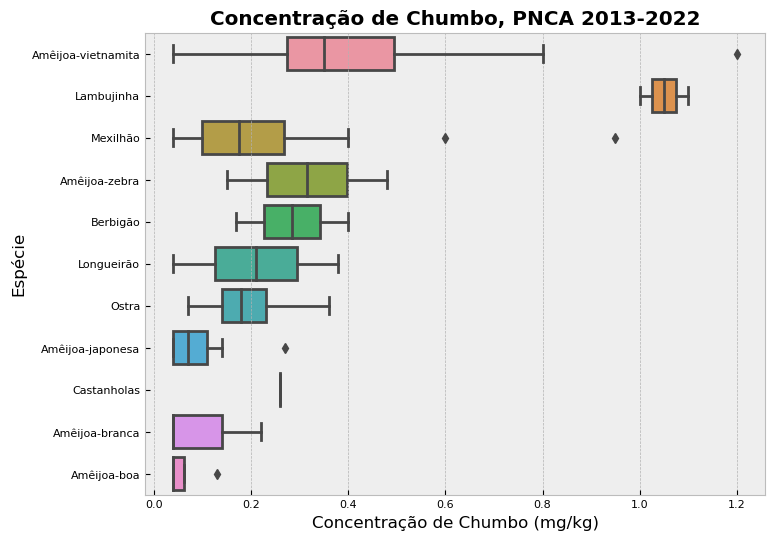

In [13]:
plt.figure(figsize=(8,6))
sns.boxplot(y="Espécie",x="Res.Trat.",data=pnca)

plt.title("Concentração de Chumbo, PNCA 2013-2022", fontweight="bold")
plt.ylabel("Espécie")
plt.yticks(fontsize=8)
plt.xlabel("Concentração de Chumbo (mg/kg)")
plt.xticks(fontsize=8)

plt.show()

Análisando a média da concentração de chumbo por espécie, a lambujinha destaca-se com maior concentração média de chumbo, cerca de 1.0500+/-0.07 mg/kg, seguindo-se a amêijoa-vietnamita com cerca de 0.398+/-0.22 mg/kg. Em contra-partida a espécie de amêijoa-boa é a espécie com menor concentração média de chumbo, apresentando um valor de 0.0625+/-0.0405mg/kg. Analaisando os boxplots é verificado que não existe um grande número de outliers que possa influenciar os resultados de quaisquer análises poster

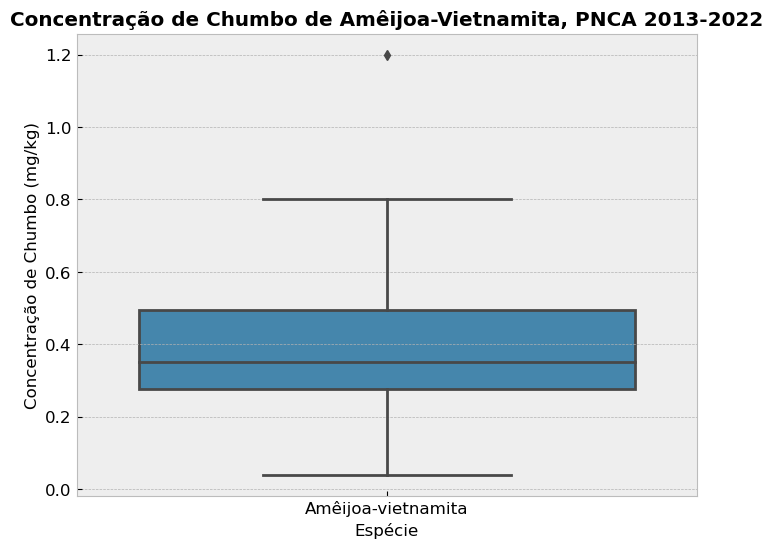

In [14]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Espécie",y="Res.Trat.",data=pnca[pnca["Espécie"]=="Amêijoa-vietnamita"])

plt.title("Concentração de Chumbo de Amêijoa-Vietnamita, PNCA 2013-2022", fontweight="bold")
plt.ylabel("Concentração de Chumbo (mg/kg)")
plt.yticks(fontsize=12)
plt.xlabel("Espécie")
plt.xticks(fontsize=12)

plt.show()

In [15]:
pnca[pnca["Espécie"]=="Amêijoa-vietnamita"].mean()

Res.Trat.    0.398387
dtype: float64

In [16]:
# Nº de Inconformidades
def conformidades(chumbo):
    if chumbo>=1.5:
        return "Não-Conforme"
    else:
        return "Conforme"

In [17]:
pnca["Observações"] = pnca["Res.Trat."].apply(conformidades)
pnca

,Espécie,Res.Trat.,Unidade,Observações
0,Amêijoa-vietnamita,1.20,mg/kg,Conforme
1,Lambujinha,1.10,mg/kg,Conforme
2,Lambujinha,1.00,mg/kg,Conforme
3,Mexilhão,0.95,mg/kg,Conforme
4,Amêijoa-vietnamita,0.80,mg/kg,Conforme
...,...,...,...,...
96,Amêijoa-japonesa,0.04,mg/kg,Conforme
97,Amêijoa-branca,0.04,mg/kg,Conforme
98,Amêijoa-boa,0.04,mg/kg,Conforme
99,Mexilhão,0.04,mg/kg,Conforme


In [18]:
pnca["Observações"].value_counts()

Conforme    101
Name: Observações, dtype: int64

Entre 2013 e 2022, não foram detetadas quaisquer inconformidades em relação à concentração de chumbo em moluscos bivalves

## 1.2. Análise Exploratória dos dados de Consumo

In [19]:
consumo = pd.read_excel("consumo_ameijoa.xlsx")
consumo

,Unnamed: 0,IAN_ID,Sexo,NUT,GrupoEtario,Porção_Ponderada,Freq.Cons,Consumo
0,0,7-03-02-0-02-343,Feminino,Região Autónoma dos Açores,Crianças,0.933800,0.621931,4.07000
1,1,6-02-01-0-03-394,Feminino,Região Autónoma da Madeira,Crianças,1.015508,0.621931,4.42000
2,2,7-03-06-0-03-169,Feminino,Região Autónoma dos Açores,Crianças,1.354010,0.621931,5.89000
3,3,7-05-04-0-03-199,Feminino,Região Autónoma dos Açores,Adolescentes,1.354010,0.621931,5.89000
4,4,1-04-01-0-13-032,Masculino,Norte,Crianças,2.033220,0.621931,8.85000
...,...,...,...,...,...,...,...,...
165,165,2-21-01-1-16-001,Masculino,Centro,Adultos,68.803399,0.621931,258.31875
166,166,5-05-01-0-15-122,Masculino,Algarve,Adultos,95.000000,0.621931,258.31875
167,167,5-12-09-1-16-221,Masculino,Algarve,Adultos,95.000000,0.621931,258.31875
168,168,5-11-01-0-16-054,Masculino,Algarve,Adultos,97.988718,0.621931,258.31875


<AxesSubplot:xlabel='Consumo'>

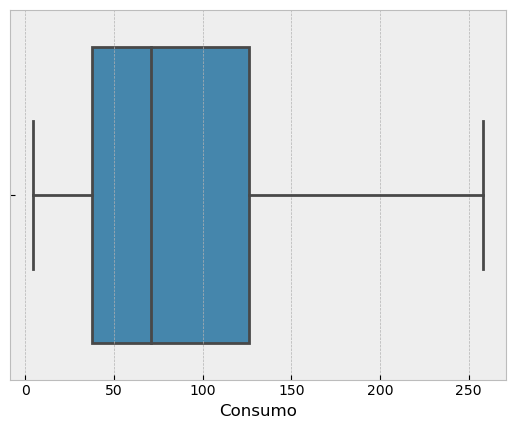

In [20]:
sns.boxplot(consumo["Consumo"])

In [21]:
consumo['GrupoEtario'].unique()

array(['Crianças', 'Adolescentes', 'Adultos', 'Idosos'], dtype=object)

In [22]:
consumo['GrupoEtario'].value_counts()

Adultos         118
Crianças         21
Adolescentes     16
Idosos           15
Name: GrupoEtario, dtype: int64

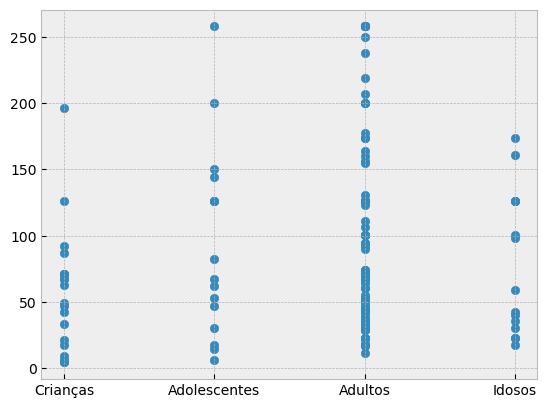

In [23]:
plt.scatter(y= consumo['Consumo'], x= consumo['GrupoEtario'])

# 2. Simulação Monte Carlo

In [24]:
# Medidas de Centralidade
def medidas_cent(data):
    mean = np.mean(data)
    std = np.std(data)
    q1 = np.percentile(data, 25)
    median = np.percentile(data, 50)
    q3 = np.percentile(data, 75)
    p90 = np.percentile(data, 90)
    maximo = np.max(data)

    print("Média:", mean)
    print("Desvio Padrão:", std)
    print("25th percentile:", q1)
    print("Mediana:", median)
    print("75th percentile:", q3)
    print("90th percentile:", p90)
    print('Máximo:', maximo)

Ajustar Distribuição Distribuição Dos Dados de Consumo e de Concentração de Moluscos Bivalves e Cruza-los de modo a gerar um x de amostras

In [25]:
# Ver as 10 mais comuns distribuições
get_common_distributions()

['cauchy',
 'chi2',
 'expon',
 'exponpow',
 'gamma',
 'lognorm',
 'norm',
 'powerlaw',
 'rayleigh',
 'uniform']

In [26]:
# Ver todas as distribuições disponíveis
get_distributions()

['_fit',
 'alpha',
 'anglit',
 'arcsine',
 'argus',
 'beta',
 'betaprime',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'cosine',
 'crystalball',
 'dgamma',
 'dweibull',
 'erlang',
 'expon',
 'exponnorm',
 'exponpow',
 'exponweib',
 'f',
 'fatiguelife',
 'fisk',
 'foldcauchy',
 'foldnorm',
 'gamma',
 'gausshyper',
 'genexpon',
 'genextreme',
 'gengamma',
 'genhalflogistic',
 'genhyperbolic',
 'geninvgauss',
 'genlogistic',
 'gennorm',
 'genpareto',
 'gibrat',
 'gilbrat',
 'gompertz',
 'gumbel_l',
 'gumbel_r',
 'halfcauchy',
 'halfgennorm',
 'halflogistic',
 'halfnorm',
 'hypsecant',
 'invgamma',
 'invgauss',
 'invweibull',
 'johnsonsb',
 'johnsonsu',
 'kappa3',
 'kappa4',
 'ksone',
 'kstwo',
 'kstwobign',
 'laplace',
 'laplace_asymmetric',
 'levy',
 'levy_l',
 'levy_stable',
 'loggamma',
 'logistic',
 'loglaplace',
 'lognorm',
 'loguniform',
 'lomax',
 'maxwell',
 'mielke',
 'moyal',
 'nakagami',
 'ncf',
 'nct',
 'ncx2',
 'norm',
 'norminvgauss',
 'pareto',
 'pearson3'

## 2.1. Concentração de Chumbo

Uma vez que a análise do inquérito IAN AF, mostra que dentre de todos as espécies de molucos bivalves a amêijoa-vietnamita, destaca-se como a espécie com maior consumo. Desta forma o foco deste estudo é a avaliação de risco de chumbo em amêijoa-vietnamita, será de seguida ajustada a distribuição da concentração de chumbo em amêijoa-vietnamita.

In [27]:
cont = pnca[pnca["Espécie"]=="Amêijoa-vietnamita"]
cont.head()

,Espécie,Res.Trat.,Unidade,Observações
0,Amêijoa-vietnamita,1.20,mg/kg,Conforme
4,Amêijoa-vietnamita,0.80,mg/kg,Conforme
5,Amêijoa-vietnamita,0.66,mg/kg,Conforme
6,Amêijoa-vietnamita,0.63,mg/kg,Conforme
8,Amêijoa-vietnamita,0.55,mg/kg,Conforme


Como podemos observar temos os dados em mg/kg, pelo que os valores com que de PTWI estão em ug/kg.peso corporal. Desta forma para calculara a ingestõa semanal de pb = (Concentraão de Pb * Consumo) / Peso Corporal. Como o consumo está em g e queremos obter um valor de ingestão semanal de pb em ug/semana para comparar com o PTWI, precismos de converter mg/kg para ug/g. Como 1 mg/kg = 1ug/g, não se torna necessário efetuar quaisquer calculos.

In [28]:
cont['Unidade'] = cont['Unidade'].str.replace('mg/kg','ug/g')
cont.head()

,Espécie,Res.Trat.,Unidade,Observações
0,Amêijoa-vietnamita,1.20,ug/g,Conforme
4,Amêijoa-vietnamita,0.80,ug/g,Conforme
5,Amêijoa-vietnamita,0.66,ug/g,Conforme
6,Amêijoa-vietnamita,0.63,ug/g,Conforme
8,Amêijoa-vietnamita,0.55,ug/g,Conforme


In [29]:
cont.head()

,Espécie,Res.Trat.,Unidade,Observações
0,Amêijoa-vietnamita,1.20,ug/g,Conforme
4,Amêijoa-vietnamita,0.80,ug/g,Conforme
5,Amêijoa-vietnamita,0.66,ug/g,Conforme
6,Amêijoa-vietnamita,0.63,ug/g,Conforme
8,Amêijoa-vietnamita,0.55,ug/g,Conforme


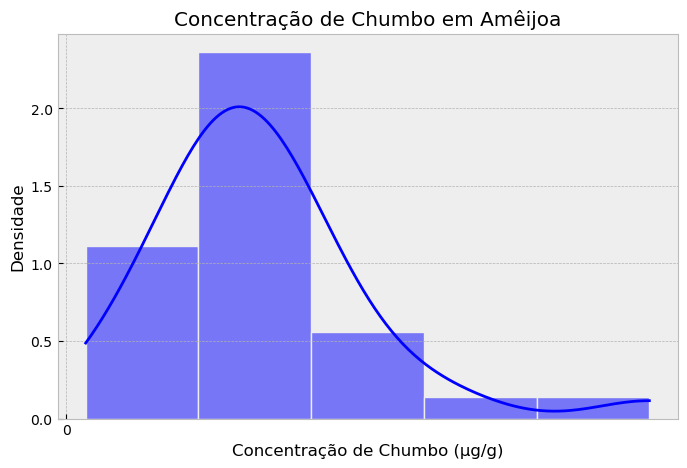

In [30]:
plt.figure(figsize=(8,5))
sns.histplot(cont["Res.Trat."], kde=True, bins=5, stat='density', linewidth=1)

plt.title("Concentração de Chumbo em Amêijoa")
plt.xticks(np.arange(0, max(cont["Res.Trat."]), 20))
plt.xlabel('Concentração de Chumbo (µg/g)')
plt.ylabel('Densidade')
plt.show()

Fitting 5 distributions: 100%|██████████| 5/5 [00:00<00:00, 10.53it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
genextreme,193.463923,167.929885,67.066181,inf,0.079223,0.981407
lognorm,193.669791,171.615006,67.099151,inf,0.081076,0.976763
gamma,194.736130,170.666287,67.269368,inf,0.085225,0.963691
norm,200.229901,221.600323,64.697824,inf,0.134111,0.586173
expon,247.409460,122.444047,71.256757,inf,0.266389,0.019707


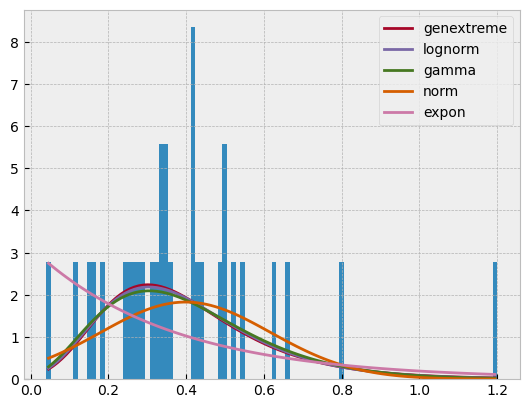

In [31]:
# Encontrar a melhor distribuição
f = Fitter(cont["Res.Trat."],
             distributions = ['gamma',
                              'lognorm',
                              'norm',
                              'expon',
                              'genextreme'])
f.fit()
f.summary()

In [32]:
# Identificar melhor distribuição
f.get_best(method = 'sumsquare_error')

{'genextreme': {'c': -0.009239690463115,
  'loc': 0.3029865476090223,
  'scale': 0.16446544538096558}}

Melhor distribuição é a genextreme, ou seja Extreme-Value.

__Ajustar Distribuição Genextreme__

Parâmetros da Distribuição Genextreme
Shape: -0.009239690463115
Loc: 0.3029865476090223
Scale: 0.16446544538096558


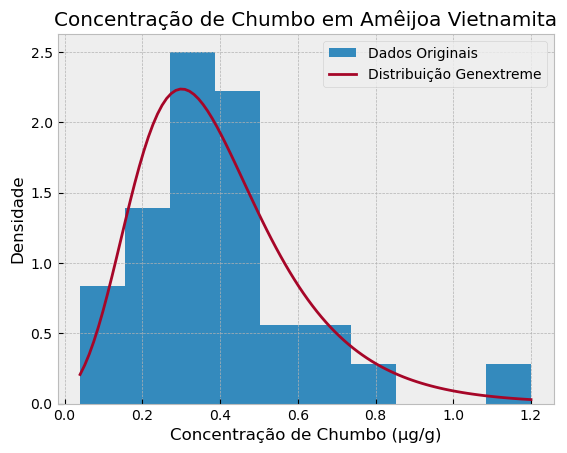

In [33]:
[shape, loc, scale] = scipy.stats.genextreme.fit(cont["Res.Trat."])

print('Parâmetros da Distribuição Genextreme')
print('Shape:', shape)
print('Loc:', loc)
print('Scale:', scale)


x = np.linspace(np.min(cont["Res.Trat."]), np.max(cont["Res.Trat."]), 100)

# Plot do histograma 
plt.hist(cont["Res.Trat."], bins=10, density=True, label='Dados Originais')

# Plot da distribuição Genextreme
plt.plot(x, scipy.stats.genextreme.pdf(x, shape, loc=loc, scale=scale), label='Distribuição Genextreme')


# Configuração do segundo subplot
plt.xlabel('Concentração de Chumbo (µg/g)')
plt.ylabel('Densidade')
plt.title('Concentração de Chumbo em Amêijoa Vietnamita')
plt.legend()


plt.show()

## 2.2. Consumo

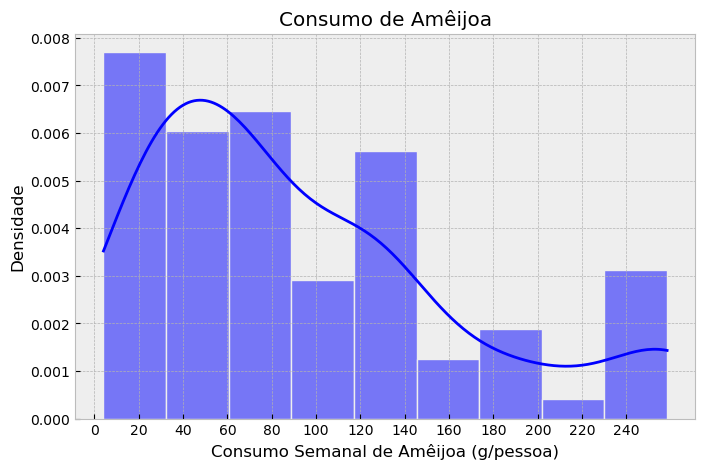

In [34]:
plt.figure(figsize=(8,5))
sns.histplot(consumo["Consumo"], kde=True,stat='density', linewidth=1)

plt.title("Consumo de Amêijoa")
plt.xticks(np.arange(0, max(consumo["Consumo"]), 20))
plt.xlabel('Consumo Semanal de Amêijoa (g/pessoa)')
plt.ylabel('Densidade')
plt.show()

Fitting 5 distributions: 100%|██████████| 5/5 [00:00<00:00,  6.38it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,0.005961,1179.609464,-1728.511211,inf,0.084845,1.632802e-01
beta,0.006040,1154.186527,-1721.126053,inf,0.104335,4.587282e-02
norm,0.006336,1174.915778,-1723.280209,inf,0.173535,6.016247e-05
chi2,0.019690,4790.191468,-1525.374255,inf,0.939884,5.361541e-208
lognorm,0.020210,1563.052843,-1520.942616,inf,0.760737,4.583891e-103


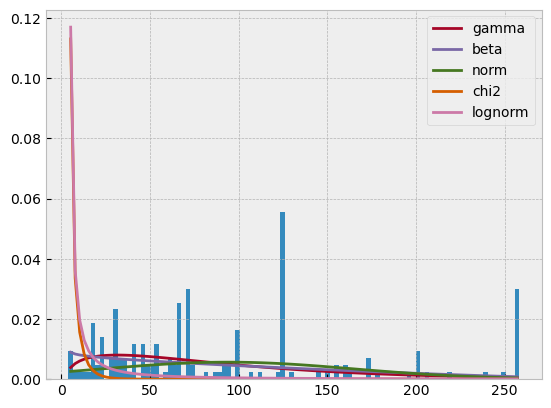

In [35]:
# Encontrar a melhor distribuição
f = Fitter(consumo["Consumo"],
                distributions=['lognorm',
                               'norm',
                               'gamma',
                               'beta',
                              'chi2'])
f.fit()
f.summary()

In [36]:
# Identificar melhor distribuição
f.get_best(method = 'sumsquare_error')

{'gamma': {'a': 1.4634158134982096,
  'loc': 2.964936217400502,
  'scale': 62.198987514860875}}

__Ajustar Distribuição Gamma__

In [37]:
def gamma(data, title):
    
    [a_fit, loc_fit, scale_fit] = scipy.stats.gamma.fit(data)

    print('Parametros da Distribuição Gamma')
    print('a:',a_fit)
    print('loc:',loc_fit)
    print('scale:',scale_fit)

    x = np.linspace(np.min(data), np.max(data), 100)

    plt.hist(data, bins=10, density=True, label='Dados Originais')

    plt.plot(x, scipy.stats.gamma.pdf(x, a_fit, loc=loc_fit, scale=scale_fit), label = 'Distribuição Gamma')

    # Set the plot labels
    plt.xlabel('Consumo Semanal de Amêigoa (g/semana)')
    plt.ylabel('Densidade')
    plt.title('{} e Consumo de Amêijoa'.format(title))
    plt.legend()

    # Show the plot
    plt.show()

Parametros da Distribuição Gamma
a: 1.4634158134982096
loc: 2.964936217400502
scale: 62.198987514860875


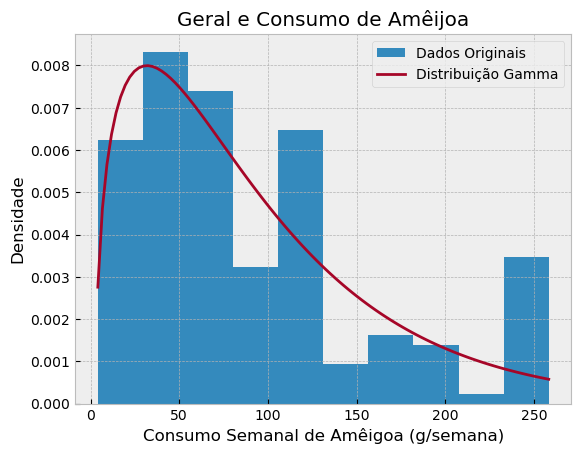

In [38]:
gamma(consumo['Consumo'],'Geral')

Melhor distribuição para os dados de consumo é a gamma

# 3. Simulação Monte Carlo

__Definir PTWI__

In [39]:
ptwi = 25

## 3.1. Adultos

In [40]:
# obter consumo de adultos
consumo_adultos = consumo[consumo['GrupoEtario']=='Adultos']
consumo_adultos

,Unnamed: 0,IAN_ID,Sexo,NUT,GrupoEtario,Porção_Ponderada,Freq.Cons,Consumo
5,5,5-11-01-0-06-109,Feminino,Algarve,Adultos,2.523792,0.621931,10.99000
7,7,4-07-06-0-15-060,Masculino,Alentejo,Adultos,3.849300,0.621931,16.76000
8,8,1-15-01-1-05-131,Feminino,Norte,Adultos,3.864105,0.621931,16.82000
9,9,1-18-01-1-15-033,Masculino,Norte,Adultos,3.864105,0.621931,16.82000
10,10,3-03-01-0-06-065,Feminino,Área Metropolitina de Lisboa,Adultos,3.864105,0.621931,16.82000
...,...,...,...,...,...,...,...,...
165,165,2-21-01-1-16-001,Masculino,Centro,Adultos,68.803399,0.621931,258.31875
166,166,5-05-01-0-15-122,Masculino,Algarve,Adultos,95.000000,0.621931,258.31875
167,167,5-12-09-1-16-221,Masculino,Algarve,Adultos,95.000000,0.621931,258.31875
168,168,5-11-01-0-16-054,Masculino,Algarve,Adultos,97.988718,0.621931,258.31875


In [41]:
from scipy.stats import genextreme, gamma
# Assumptions
body_weight = 65
população = 815357 # número de individuos na população portuguesa
num_simulations = int(math.sqrt(população)) # raiz quadrada pois vamos obter uma matriz
 

# Simulação
np.random.seed(42)
ing_pb = []

for i in range(0,num_simulations):
    
    # Ajustar distribuição de Concentração de Chumbo
    shape, loc, scale = genextreme.fit(cont["Res.Trat."])
    cont_dist = genextreme.rvs(shape, loc=loc, scale=scale, size=num_simulations)

    # Ajustar a distribuição de Consumo de Amêijoa para Adultos
    shape, loc, scale = gamma.fit(consumo_adultos["Consumo"])
    cons_dist = gamma.rvs(shape, loc=loc, scale=scale, size=num_simulations)

    # Calcular a Ingestão de Chumbo
    exp = (cont_dist * cons_dist) / body_weight
    ing_pb.append(exp)

In [42]:
ing_pb = np.array(ing_pb)
ing_pb

array([[0.4896594 , 0.2899529 , 0.36984376, ..., 0.07144064, 0.15091555,
        0.20960034],
       [1.23226362, 0.15829914, 0.22967727, ..., 0.25469352, 1.02812718,
        0.35565515],
       [0.6849964 , 0.10647896, 0.42860674, ..., 1.75099499, 0.36647582,
        0.06063658],
       ...,
       [0.0677105 , 0.27755239, 0.11755108, ..., 0.2703043 , 0.26764819,
        0.9803219 ],
       [0.75976379, 0.85691706, 0.25031679, ..., 0.94134832, 0.343467  ,
        0.83408512],
       [0.49443233, 0.16699524, 0.04555899, ..., 0.27782064, 1.71781736,
        0.19308193]])

In [43]:
def hist(data,title):
    # Plot the histogram
    plt.hist(data, edgecolor='blue')

    # Add labels and title
    plt.xlabel('Ingestão de Chumbo (ug/kg pc/semana))')
    plt.ylabel('Frequência')
    plt.title('Ingestão de Chumbo em {}'.format(title))

    # Show the plot
    plt.show()

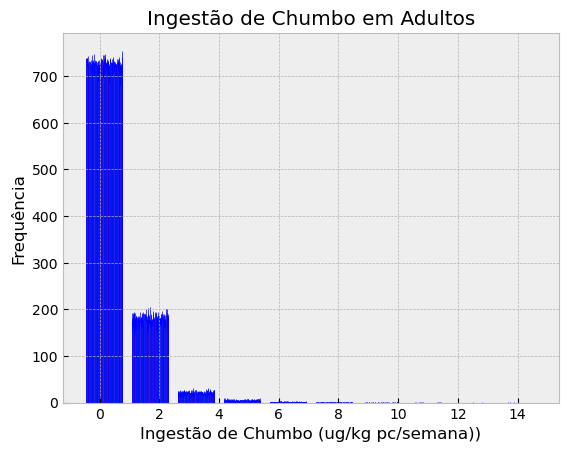

In [44]:
hist(ing_pb,'Adultos')

__Medidas de Centralidade__

In [45]:
medidas_cent(ing_pb)

Média: 0.6288194630943145
Desvio Padrão: 0.654382657212516
25th percentile: 0.21005297526421446
Mediana: 0.42446102122289
75th percentile: 0.813184694659397
90th percentile: 1.386197213588418
Máximo 14.784586121544748


__Probabilidade de Exceder o PTWI__

In [46]:
def prob(ingestão_chumbo, weight, num_simulations,ptwi):
    exceed_limit_count = np.sum(ingestão_chumbo > ptwi)
    exceed_limit_percent = (exceed_limit_count / (num_simulations * num_simulations) * 100)
    print("Numéro de Valores Que Excedem o PTWI:", exceed_limit_count)
    print("% Valores que Excederam o PTWI:",exceed_limit_percent,"%")

In [47]:
prob(ing_pb, body_weight ,num_simulations,ptwi)

Numéro de Valores Que Excedem o PTWI: 0
% Valores que Excederam o PTWI: 0.0 %


## 3.2. Crianças

In [48]:
# Definir consumo para Crianças
consumo_crianças = consumo[consumo['GrupoEtario']=='Crianças']
consumo_crianças

,Unnamed: 0,IAN_ID,Sexo,NUT,GrupoEtario,Porção_Ponderada,Freq.Cons,Consumo
0,0,7-03-02-0-02-343,Feminino,Região Autónoma dos Açores,Crianças,0.933800,0.621931,4.07
1,1,6-02-01-0-03-394,Feminino,Região Autónoma da Madeira,Crianças,1.015508,0.621931,4.42
2,2,7-03-06-0-03-169,Feminino,Região Autónoma dos Açores,Crianças,1.354010,0.621931,5.89
4,4,1-04-01-0-13-032,Masculino,Norte,Crianças,2.033220,0.621931,8.85
14,14,7-03-02-0-03-324,Feminino,Região Autónoma dos Açores,Crianças,3.868048,0.621931,16.84
16,16,6-03-01-0-12-284,Masculino,Região Autónoma da Madeira,Crianças,4.806112,0.621931,20.92
38,38,3-09-01-0-13-078,Masculino,Área Metropolitina de Lisboa,Crianças,7.528092,0.621931,32.77
47,47,7-05-06-1-12-339,Masculino,Região Autónoma dos Açores,Crianças,9.612225,0.621931,41.85
52,52,5-10-01-0-03-083,Feminino,Algarve,Crianças,10.694982,0.621931,46.56
55,55,2-03-01-0-03-030,Feminino,Centro,Crianças,11.270000,0.621931,49.06


In [49]:
# Assumptions
body_weight = 15
população = 867032 # número de individuos na população portuguesa
num_simulations = int(math.sqrt(população)) # raiz quadrada pois vamos obter uma matriz

# Simulação
np.random.seed(42)
ing_pb = []

for i in range(0,num_simulations):
    
    # Ajustar distribuição de Concentração de Chumbo
    shape, loc, scale = genextreme.fit(cont["Res.Trat."])
    cont_dist = genextreme.rvs(shape, loc=loc, scale=scale, size=num_simulations)

    # Ajustar a distribuição de Consumo Geral de Amêijoa
    shape, loc, scale = gamma.fit(consumo_crianças["Consumo"])
    cons_dist = gamma.rvs(shape, loc=loc, scale=scale, size=num_simulations)

    # Calcular a Ingestão de Chumbo
    exp = (cont_dist * cons_dist) / body_weight
    ing_pb.append(exp)

In [50]:
ing_pb = np.array(ing_pb)
ing_pb

array([[1.84211372, 1.61701732, 1.1781342 , ..., 2.311323  , 0.28451241,
        3.23363833],
       [0.24555337, 1.04117264, 0.58743015, ..., 1.12207658, 0.3817107 ,
        0.80394002],
       [0.08766869, 0.97038112, 0.54644424, ..., 1.02779297, 3.02984049,
        2.01371275],
       ...,
       [0.22423127, 0.22763496, 1.65575219, ..., 0.83323478, 1.54773603,
        0.12582314],
       [0.26740167, 0.23531273, 1.38500891, ..., 0.72225421, 8.11830009,
        0.18167592],
       [0.25505323, 0.07839087, 2.78715006, ..., 1.06922835, 1.76877139,
        0.08641425]])

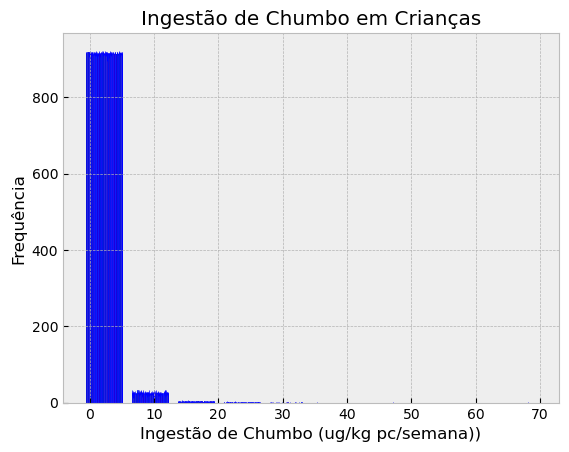

In [51]:
hist(ing_pb,'Crianças')

__Medidas de Centralidade__

In [52]:
medidas_cent(ing_pb)

Média: 1.1984138032180638
Desvio Padrão: 1.618058110511646
25th percentile: 0.25298296447464597
Mediana: 0.6311310265551834
75th percentile: 1.4892707059303578
90th percentile: 2.9238077423074724
Máximo 70.15954047975296


__Probabilidade de Exceder o PTWI__

In [53]:
prob(ing_pb, body_weight ,num_simulations,ptwi)

Numéro de Valores Que Excedem o PTWI: 42
% Valores que Excederam o PTWI: 0.004845626418355233 %


## 3.3. Adolescentes

In [54]:
# Definir consumo de adolescentes
consumo_adolescentes = consumo[consumo['GrupoEtario']=='Adolescentes']
consumo_adolescentes

,Unnamed: 0,IAN_ID,Sexo,NUT,GrupoEtario,Porção_Ponderada,Freq.Cons,Consumo
3,3,7-05-04-0-03-199,Feminino,Região Autónoma dos Açores,Adolescentes,1.354010,0.621931,5.89000
6,6,2-21-01-0-14-066,Masculino,Centro,Adolescentes,3.206700,0.621931,13.96000
13,13,3-12-01-0-04-067,Feminino,Área Metropolitina de Lisboa,Adolescentes,3.868048,0.621931,16.84000
29,29,4-11-01-0-14-123,Masculino,Alentejo,Adolescentes,6.864723,0.621931,29.89000
53,53,3-21-01-0-04-129,Feminino,Área Metropolitina de Lisboa,Adolescentes,10.800000,0.621931,47.02000
60,60,2-16-01-0-04-054,Feminino,Centro,Adolescentes,12.182560,0.621931,53.04000
66,66,5-02-05-0-04-006,Feminino,Algarve,Adolescentes,14.212986,0.621931,61.88000
74,74,3-03-01-1-04-070,Feminino,Área Metropolitina de Lisboa,Adolescentes,15.392125,0.621931,67.01000
95,95,2-19-01-0-14-005,Masculino,Centro,Adolescentes,18.967156,0.621931,82.57000
113,113,7-04-06-0-14-038,Masculino,Região Autónoma dos Açores,Adolescentes,28.921198,0.621931,125.91000


In [66]:
# Assumptions
body_weight = 45
população = 1029582 # número de individuos na população portuguesa
num_simulations = int(math.sqrt(população)) # raiz quadrada pois vamos obter uma matriz


# Simulação
np.random.seed(42)
ing_pb = []

for i in range(0,num_simulations):
    
    # Ajustar distribuição de Concentração de Chumbo
    shape, loc, scale = genextreme.fit(cont["Res.Trat."])
    cont_dist = genextreme.rvs(shape, loc=loc, scale=scale, size=num_simulations)

    # Ajustar a distribuição de Consumo Geral de Amêijoa
    shape, loc, scale = gamma.fit(consumo_adolescentes["Consumo"])
    cons_dist = gamma.rvs(shape, loc=loc, scale=scale, size=num_simulations)

    # Calcular a Ingestão de Chumbo
    exp = (cont_dist * cons_dist) / body_weight
    ing_pb.append(exp)

In [67]:
ing_pb = np.array(ing_pb)
ing_pb

array([[0.6429223 , 0.22837019, 1.00924139, ..., 3.30119706, 2.09209695,
        0.31873222],
       [1.89658126, 0.50826203, 0.59769652, ..., 0.67387051, 0.13307734,
        1.2281212 ],
       [1.30866593, 0.37921544, 0.26272772, ..., 0.4584159 , 0.11529035,
        0.29170292],
       ...,
       [0.06209808, 3.30435057, 1.88351609, ..., 4.96312034, 0.49030168,
        0.03608056],
       [0.14889686, 1.87340313, 0.36148996, ..., 0.1029353 , 0.34141369,
        0.23234301],
       [0.82917995, 0.14186462, 0.78912603, ..., 0.53380507, 0.20791211,
        0.18092114]])

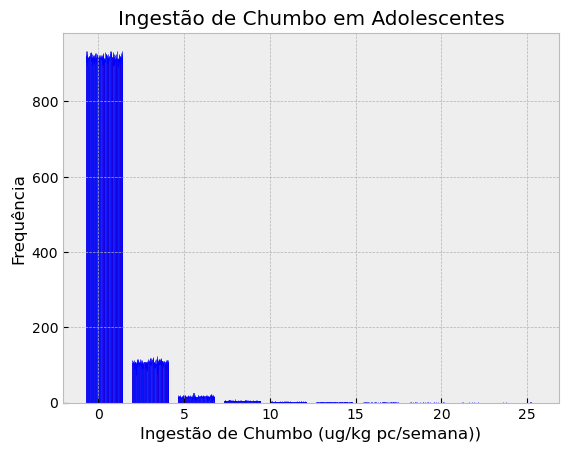

In [68]:
hist(ing_pb,'Adolescentes')

__Medidas de Centralidade__

In [69]:
medidas_cent(ing_pb)

Média: 0.7007842753697501
Desvio Padrão: 1.0249815278698255
25th percentile: 0.12081298524284373
Mediana: 0.33309863620741686
75th percentile: 0.8547100438986347
90th percentile: 1.761143147898917
Máximo 25.80468484520713


__Probabilidade de Exceder o PTWI__

In [70]:
prob(ing_pb, body_weight ,num_simulations,ptwi)

Numéro de Valores Que Excedem o PTWI: 1
% Valores que Excederam o PTWI: 9.725772129049324e-05 %


## 3.4. Idosos

In [60]:
# Definir consumo de idosos
consumo_idosos = consumo[consumo['GrupoEtario']=='Idosos']
consumo_idosos

,Unnamed: 0,IAN_ID,Sexo,NUT,GrupoEtario,Porção_Ponderada,Freq.Cons,Consumo
12,12,5-03-03-1-07-174,Feminino,Algarve,Idosos,3.868048,0.621931,16.84
18,18,1-08-01-0-07-026,Feminino,Norte,Idosos,5.148542,0.621931,22.41
23,23,4-12-01-0-17-006,Masculino,Alentejo,Idosos,5.152140,0.621931,22.43
31,31,5-03-03-1-17-016,Masculino,Algarve,Idosos,6.864723,0.621931,29.89
40,40,2-03-01-0-17-041,Masculino,Centro,Idosos,8.055676,0.621931,35.07
44,44,4-03-01-1-17-189,Masculino,Alentejo,Idosos,9.112158,0.621931,39.67
48,48,4-03-01-1-17-035,Masculino,Alentejo,Idosos,9.612225,0.621931,41.85
63,63,2-19-01-0-17-048,Masculino,Centro,Idosos,13.524000,0.621931,58.88
102,102,5-11-01-1-07-085,Feminino,Algarve,Idosos,22.593149,0.621931,98.36
103,103,3-20-02-2-18-112,Masculino,Área Metropolitina de Lisboa,Idosos,22.993949,0.621931,100.10


In [61]:
# Assumptions
body_weight = 65
população = 257527 # número de individuos na população portuguesa
num_simulations = int(math.sqrt(população)) # raiz quadrada pois vamos obter uma matriz


# Simulação
np.random.seed(42)
ing_pb = []

for i in range(0,num_simulations):
    
    # Ajustar distribuição de Concentração de Chumbo
    shape, loc, scale = genextreme.fit(cont["Res.Trat."])
    cont_dist = genextreme.rvs(shape, loc=loc, scale=scale, size=num_simulations)

    # Ajustar a distribuição de Consumo Geral de Amêijoa
    shape, loc, scale = gamma.fit(consumo_idosos["Consumo"])
    cons_dist = gamma.rvs(shape, loc=loc, scale=scale, size=num_simulations)

    # Calcular a Ingestão de Chumbo
    exp = (cont_dist * cons_dist) / body_weight
    ing_pb.append(exp)

In [62]:
ing_pb = np.array(ing_pb)
ing_pb

array([[ 0.36942994,  0.63203956,  0.15243332, ...,  0.37309033,
         0.05313842,  0.47774201],
       [ 0.29294635,  0.0424857 ,  0.08864476, ...,  0.03103526,
         0.10922729,  0.26007089],
       [ 0.08487163,  0.21150583,  0.05887394, ...,  0.09828624,
         0.30894032,  0.09337526],
       ...,
       [ 0.25937895,  0.20634144,  0.28177432, ...,  0.20574736,
         0.26742329,  0.36164206],
       [ 0.7052871 ,  0.3498593 ,  0.76220439, ...,  0.16577026,
         0.10148068,  0.09658389],
       [ 0.15217366,  0.19817312,  0.19145759, ...,  0.15737478,
         0.15289472, -0.05058206]])

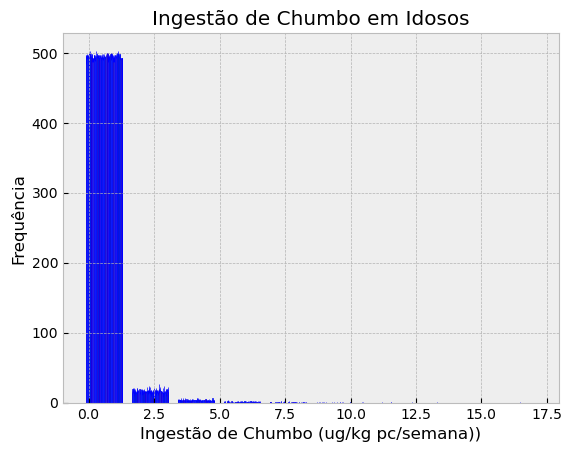

In [63]:
hist(ing_pb,'Idosos')

__Medidas de Centralidade__

In [64]:
medidas_cent(ing_pb)

Média: 0.3007469600546602
Desvio Padrão: 0.4918231077141423
25th percentile: 0.08824262681223623
Mediana: 0.144987599418048
75th percentile: 0.2870594372678763
90th percentile: 0.6819121240103503
Máximo 17.2791672403954


__Probabilidade de Exceder o PTWI__

In [65]:
prob(ing_pb, body_weight ,num_simulations,ptwi)

Numéro de Valores Que Excedem o PTWI: 0
% Valores que Excederam o PTWI: 0.0 %
